In [106]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re
from sklearn.preprocessing import OneHotEncoder

[nltk_data] Downloading package stopwords to C:\Users\MY
[nltk_data]     LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\MY
[nltk_data]     LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [107]:
# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('D:/DA/archive/LINKEDIN_REVIEWS.csv')

# Drop rows with missing values for simplicity (handle missing data appropriately in a real-world scenario)
df = df.dropna()

In [108]:
df.head(100)

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,cd2c2a2c-750b-435c-823c-277a6dbcef2a,1.530000e+20,A Google user,Well designed app. It's much easier to use tha...,5,0,1.0.3,4/7/2011 15:57
1,1,ac8d5093-31ce-4f12-8c6b-ee79a06295ab,2.340000e+20,A Google user,Cool!,5,1,1.0.0,4/7/2011 15:59
2,2,bbae055c-f20b-4c01-b604-7cea72416a3a,1.740000e+20,A Google user,Great to finally see this on the market!,5,0,2.0.5,4/7/2011 16:16
3,3,38a13596-b208-423d-8d96-3199e1993138,2.870000e+20,A Google user,Great app,5,1,1.0.0,4/7/2011 16:22
4,4,9ddd29ce-b137-4286-9aa1-3bbdd0015e0a,1.670000e+20,A Google user,Finally! Would love a Homeycomb specific versi...,4,0,1.0.0,4/7/2011 17:41
...,...,...,...,...,...,...,...,...,...
95,95,fe7112ed-ec9c-43ee-823c-adc6f35c5901,3.310000e+20,A Google user,"I just don't see the point, there's already fa...",1,2,1.0.0,4/11/2011 22:05
96,96,30ff65e4-d2e5-4df6-a23e-5df0698f24ae,1.040000e+20,A Google user,Great app - all functionality working fine. Droid,4,0,1.0.0,4/11/2011 22:26
97,97,5ed26525-8bf7-4e4a-9f12-f1426b77b76b,3.290000e+20,A Google user,"A little slow, but great application. I would ...",4,0,1.0.0,4/11/2011 23:24
98,98,9ef6447f-e490-4a5d-afaa-a5b5632bdaa5,3.170000e+20,A Google user,Solid app. Happy they finally made one. Works ...,4,1,1.0.0,4/12/2011 0:15


In [101]:
# Define a function to identify and extract icons
def extract_icons(text):
    # You can define your specific pattern here
    icon_pattern = re.compile(r"[icon_pattern]")
    icons = re.findall(icon_pattern, text)
    return icons

In [109]:
# Same as previous code
def preprocess_text(text):
    # Lowercase, remove punctuation, stop words
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words])

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    text = lemmatizer.lemmatize(text)
    return text
df["review_text_preprocessed"] = df["review_text"].apply(preprocess_text)

In [110]:
# Create VADER sentiment analyzer
vader = SentimentIntensityAnalyzer()

# Analyze sentiment of preprocessed text
df["sentiment"] = df["review_text_preprocessed"].apply(lambda text: vader.polarity_scores(text)["compound"])

# Normalize sentiment scores between 0 and 5
def normalize_score(score):
    score = (score + 1) / 2
    score *= 5
    return score

df["sentiment"] = df["sentiment"].apply(normalize_score)

In [90]:
df.tail(100)

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp,review_text_preprocessed,sentiment
322527,322527,4b77cdbc-9060-4e8c-b586-602a3acc33e6,1.750000e+20,Su***********ia,Why there are innumerable ads on a professiona...,1,5,4.1.884,11/17/2023 12:00,innumerable ads professional website like link...,3.12500
322528,322528,11f1bcaf-04d8-43e4-8285-308e65e6ca48,2.350000e+20,Ge***********ka,Optimum,5,0,4.1.884,11/17/2023 12:01,optimum,2.50000
322529,322529,5e5784f9-50a4-4cfd-a2ff-3e53c92faf17,5.210000e+20,Be***********wo,Great App. Makes it easy to commune with colle...,5,0,4.1.858,11/17/2023 12:05,great app makes easy commune colleagues client...,4.47650
322530,322530,040cbc8f-3638-4f5a-9508-c624099ac30a,2.660000e+20,Je**********dt,With the LinkedIn App you can achieve big goal...,5,0,4.1.878,11/17/2023 12:16,linkedin app achieve big goals tool business a...,4.47350
322531,322531,63bc1126-5fa7-46bf-9504-fc58431cd145,7.290000e+20,Ta*********us,"Amazing, great traction and professional.",5,0,4.1.881,11/17/2023 12:21,amazing great traction professional,4.59000
...,...,...,...,...,...,...,...,...,...,...,...
322636,322636,171c29e4-f949-4184-a855-088601940556,2.760000e+20,Di***********gh,Better experience,5,0,4.1.884,11/18/2023 3:28,better experience,3.60100
322637,322637,60bb1c67-895f-4cd9-8dcd-75e265964304,1.340000e+20,Da*******rd,Great networking app!,5,0,4.1.884,11/18/2023 3:28,great networking app,4.06225
322638,322638,aacd49a4-d8ab-412b-b524-3b4e08c9cbcb,1.280000e+20,Si***********li,For the love of God! Please activate your cust...,2,0,4.1.884,11/18/2023 3:42,love god please activate customer support prio...,4.55625
322639,322639,b2af83e8-5ee5-43b0-98ca-1cdc975b0780,2.360000e+20,Ju***************ez,Excepcional,5,0,4.1.881,11/18/2023 3:59,excepcional,2.50000


In [119]:
top_versions_sentiment = df.sort_values(by='sentiment', ascending=False).head(20)
buttom_versions_sentiment = df.sort_values(by='sentiment', ascending=False).tail(20)

In [120]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create bar plots for top versions with best sentiment, review rating, and review likes
plt.figure(figsize=(100, 40))

<Figure size 10000x4000 with 0 Axes>

<Figure size 10000x4000 with 0 Axes>

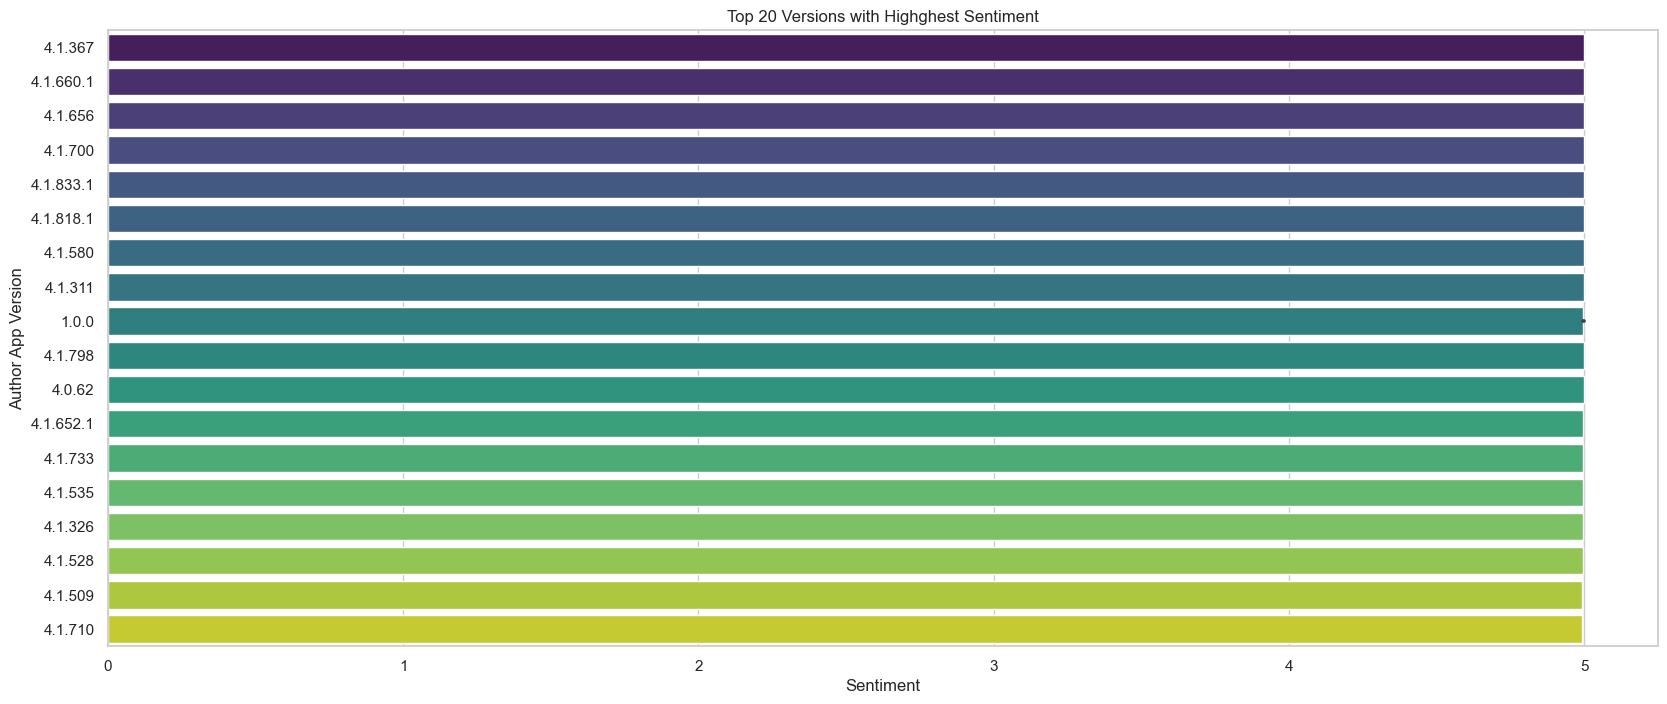

In [123]:
# Create a horizontal bar plot
plt.figure(figsize=(20, 8))
sns.barplot(x='sentiment', y='author_app_version', data=top_versions_sentiment, palette='viridis')
plt.title('Top 20 Versions with Highghest Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Author App Version')

plt.show()

Text(0, 0.5, 'Author App Version')

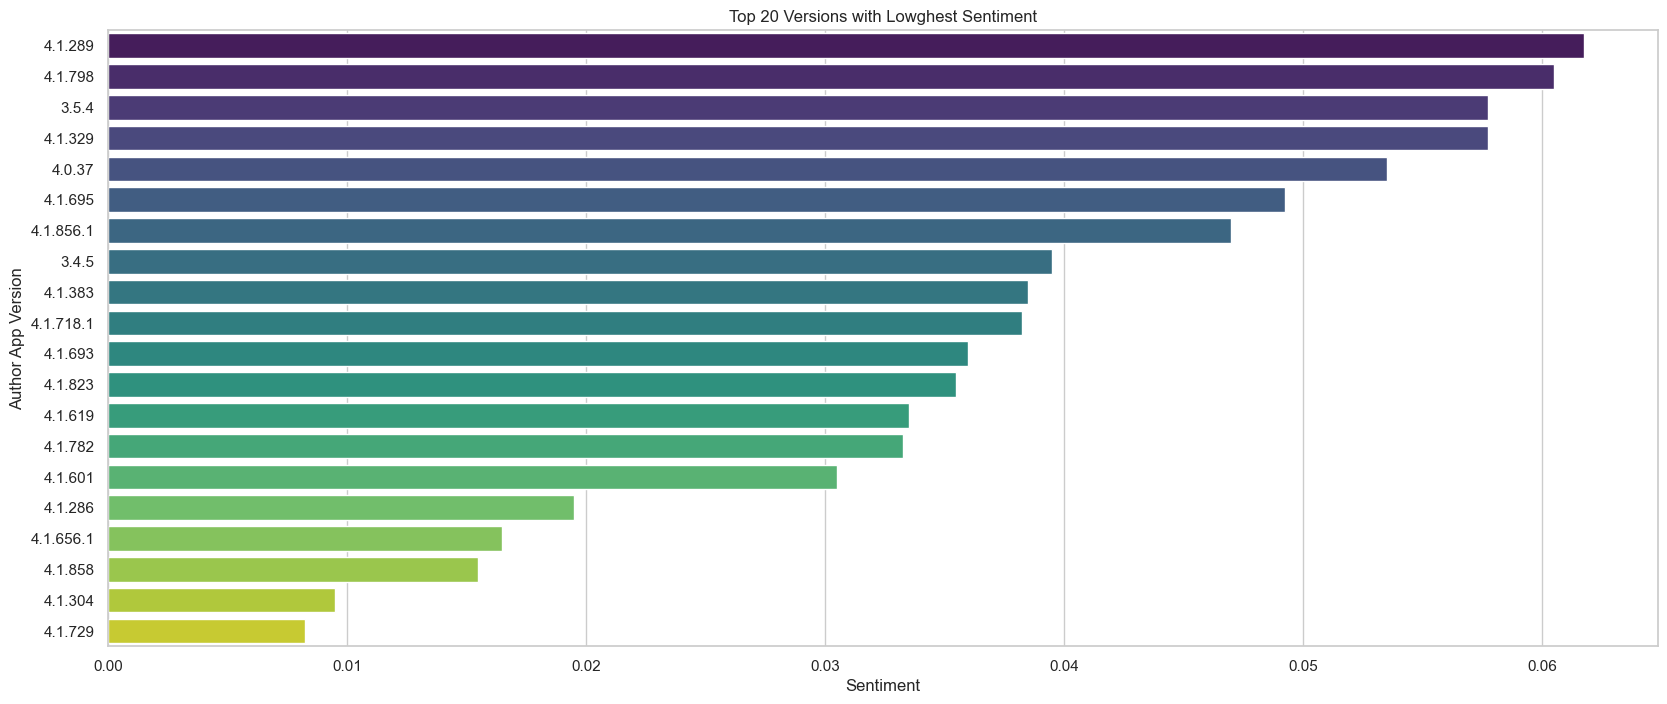

In [124]:
# Create a horizontal bar plot
plt.figure(figsize=(20, 8))
sns.barplot(x='sentiment', y='author_app_version', data=buttom_versions_sentiment, palette='viridis')
plt.title('Top 20 Versions with Lowghest Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Author App Version')